# Mistral OCR

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import base64
import json
from pathlib import Path
from dotenv import load_dotenv
from mistralai import Mistral, DocumentURLChunk
from mistralai.models import OCRResponse
from mistralai.extra import response_format_from_pydantic_model

from IPython.display import display, Markdown, Image as dImage

# Params

In [3]:
path_data = Path() / "data"
path_input = path_data / "raw"
path_output = path_data / "interim" / "mistral-ocr"  # Store converted

# also, pages are stored in `path_output_chunks` as an aditional chunking strategy

path_output.mkdir(exist_ok=True, parents=True)

In [4]:
MODEL = "mistral-ocr-latest"

# Environment Variables

In [5]:
load_dotenv()

MISTRAL_API_KEY = os.environ["MISTRAL_API_KEY"]

# Clients

In [6]:
client_mistral = Mistral(api_key=MISTRAL_API_KEY)


## PDF Conversion

In [7]:
input_file = "Divulgacion Planetaria Althera.pdf"  # document per local path or URL
output_file = "Divulgacion-Planetaria-Althera.md"
input_doc_path = path_input / input_file


# Read PDF
pdf_file = Path(input_doc_path)
assert pdf_file.is_file()

# Upload PDF
uploaded_file = client_mistral.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)
signed_url = client_mistral.files.get_signed_url(file_id=uploaded_file.id, expiry=1)


In [8]:
print(f"{uploaded_file.id=}")

uploaded_file.id='de946394-903a-4b9a-ab84-614a03db18a3'


In [9]:
client_mistral.files.list()

ListFilesOut(data=[FileSchema(id='de946394-903a-4b9a-ab84-614a03db18a3', object='file', size_bytes=1316141, created_at=1757021710, filename='Divulgacion Planetaria Althera', purpose='ocr', sample_type='ocr_input', source='upload', num_lines=0, mimetype='application/pdf', signature='34e1bec7e8e39ee66a2d2a302914cf9a'), FileSchema(id='20e3b1f8-cf25-40a4-bdd8-169e90de5e2c', object='file', size_bytes=1359430, created_at=1756929287, filename='Divulgacion Planetaria Althera', purpose='ocr', sample_type='ocr_input', source='upload', num_lines=0, mimetype='application/pdf', signature='6141af7ff9c8b9bcb96373eafebc6a50')], object='list', total=2)

In [10]:
# OCR
pdf_response = client_mistral.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url), 
    model=MODEL, 
    include_image_base64=True
    )

## Pages

* Tables are extracted and inserted into the markdown
* In general, headers and footers are ignored

In [11]:
Markdown(pdf_response.pages[0].markdown)

# Un nuevo y fascinante vecino: Althéra 

Índice

1. Historia del descubrimiento
2. Conoce a Althéra
3. Los soles de Althéra
4. Estructura general de Althéra
5. Planetas interiores
6. Planetas exteriores
7. Lunas y satélites menores
8. Fenómenos destacados
9. Habitabilidad y astrobiología
10. Conclusiones y perspectivas futuras

## 1. Historia del descubrimiento

### 1.1 Primeras observaciones y sospechas iniciales

El sistema binario Althéra (HD 4579 AB ) fue detectado por primera vez en el año 2032 durante una campaña de observación del Observatorio Espacial James Webb, dirigida por la astrofísica chilena Dra. Mariela Estay. La misión principal era estudiar la composición atmosférica de exoplanetas candidatos a la habitabilidad, pero un patrón anómalo en el flujo luminoso proveniente de la constelación de Orión llamó la atención del equipo. El análisis de curvas de luz reveló oscilaciones periódicas dobles, un indicio claro de la presencia de dos estrellas en órbita mutua y varios cuerpos orbitando de forma circumbinaria.

### 1.2 Confirmación mediante técnicas combinadas

En los meses siguientes, un consorcio internacional liderado por la Agencia Espacial Europea (ESA) y el Instituto Max Planck de Astronomía desplegó observaciones complementarias utilizando:

- ELT (Extremely Large Telescope) en el Desierto de Atacama para espectroscopía de alta resolución.
- Telescopio Espacial Nancy Grace Roman para fotometría de gran precisión en tránsitos.
- Interferometría de radio desde la red Very Long Baseline Array (VLBA) para afinar la distancia y parámetros orbitales del sistema.

Fue el equipo del astrónomo estadounidense Dr. Jonathan Kepler-Saunders quien confirmó, mediante el método de velocidad radial ultraestable, la existencia de cinco planetas principales y varios cinturones de escombros.

In [ ]:
Markdown(pdf_response.pages[3].markdown)  # image ref and table

Esta combinación de espectros produce un ambiente luminoso único en los planetas circumbinarios, donde la radiación es más equilibrada en el rango visible y cercana al infrarrojo, favoreciendo la fotosíntesis de potenciales formas de vida adaptadas a ambas fuentes.

# 3.2 Masas, radios y luminosidades comparadas 

El sistema binario Althéra está formado por dos estrellas de características bien contrastadas:
Althéra A, más masiva y luminosa, con 1,28 masas solares, un radio de 1,32 radios solares y una temperatura superficial de 6.350 K, y Althéra B, más pequeña y fría, con 0,82 masas solares, 0,74 radios solares y 4.950 K. Aunque la luminosidad de Althéra A ( 2,4 veces la del Sol) domina el aporte energético global, la
![img-0.jpeg](img-0.jpeg)

Figure 1 Atardecer en Althera
presencia de Althéra B, con una luminosidad de $0,39 \mathrm{~L} \odot$, actúa como un regulador térmico que suaviza las variaciones extremas de temperatura en la zona habitable, contribuyendo a su estabilidad a largo plazo.

| Parámetro | Althéra A | Althéra B |
| :-- | :-- | :-- |
| Masa | $1,28 \mathrm{M} \odot$ | $0,82 \mathrm{M} \odot$ |
| Radio | $1,32 \mathrm{RO}$ | $0,74 \mathrm{RO}$ |
| Luminosidad | $2,4 \mathrm{~L} \odot$ | $0,39 \mathrm{~L} \odot$ |
| Temperatura superficial | 6.350 K | 4.950 K |

La diferencia de luminosidad significa que, aunque Althéra A domina el aporte energético, Althéra B contribuye de manera significativa a la estabilidad térmica del sistema, suavizando las variaciones extremas en la zona habitable.

### 3.3 Ciclo de vida y edad estimada del sistema binario

Estudios de metalicidad realizados con el ELT indican que ambas estrellas tienen composiciones químicas similares, con una proporción de elementos pesados algo mayor que la del Sol ( $[\mathrm{Fe} / \mathrm{H}] \approx+0,08$ ). Esto sugiere que se formaron a partir de la misma nube molecular hace aproximadamente $\mathbf{4 . 9 0 0}$ millones de años, una edad comparable a la del Sistema Solar.

In [ ]:
Markdown(pdf_response.pages[5].markdown)  # plot (title and x-axis content) ref and table

Planetas del sistema Althéra: distancia vs masa
![img-1.jpeg](img-1.jpeg)

A continuación se muestran las distancias medias al baricentro binario y los períodos orbitales:

| Cuerpo | Tipo | Distancia media (UA) | Periodo orbital (días terrestres) |
| :--: | :--: | :--: | :--: |
| Thyros I (HD 4579 $A b)$ | Rocoso | 0,78 | 215 |
| Névalis II (HD 4579 Ac) | Rocoso | 1,36 | 397 |
| Cinturón de Arges | Asteroides metálicos | $1,65-1,85$ |  |
| Aurelia III (HD 4579 $A d)$ | Rocoso, habitable | 2,21 | 589 |
| Zephyros IV (HD 4579 Ae) | Gigante gaseoso | 4,92 | 2.689 |
| Krion V (HD 4579 Af) | Gigante helado | 8,14 | 6.873 |

In [ ]:
Markdown(pdf_response.pages[-2].markdown) # formulas

# Anexo: Estabilidad de órbitas circumbinarias (Holman \& Wiegert, 1999) 

Como anexo al estudio de la arquitectura orbital de Althéra, resulta relevante considerar el límite teórico de estabilidad circumbinaria definido por Holman \& Wiegert (1999). Esta formulación permite calcular la distancia mínima a la que un planeta puede mantener una órbita estable alrededor de dos estrellas, en función de la separación, la excentricidad del binario y la relación de masas estelares. Aplicado a Althéra, el valor obtenido es de aproximadamente $\mathbf{1 , 1 9}$ UA, lo que implica que cualquier órbita interior a esa distancia sufriría perturbaciones
gravitatorias capaces de desestabilizarla a largo plazo. Sin embargo, al incorporar factores adicionales como resonancias con los gigantes exteriores, excentricidades planetarias y variaciones inducidas por la actividad estelar, el margen práctico de seguridad se sitúa en torno a 1,8 UA. Esta cifra explica por qué no se observan planetas estables más cerca del centro binario y por qué Aurelia III, ubicada en el corazón de la zona habitable, disfruta de condiciones dinámicamente estables.

Límite interior teórico de estabilidad para órbitas circumbinarias:

$$
a_{\text {crit }}=a_{b}\left[1.60+5.10 e_{b}-2.22 e_{b}^{2}+4.12 \mu-4.27 e_{b} \mu-5.09 \mu^{2}+4.61 e_{b}^{2} \mu^{2}\right]
$$

## Parámetros de Althéra:

- Separación media del binario: $a_{b}=0,42$ UA
- Excentricidad del binario: $e_{b}=0,12$
- Masas estelares: $M_{A}=1,28 M_{\odot}, M_{B}=0,82 M_{\odot}$
- Relación de masas: $\mu=\frac{M_{B}}{M_{A}+M_{B}}=\frac{0,82}{1,28+0,82} \approx 0,3905$


## Sustituyendo:

$$
\text { factor } \approx 2,8228 \Rightarrow a_{\text {crit }}=0,42 \times 2,8228 \approx \mathbf{1 , 1 8 6} \mathrm{UA}
$$

Interpretación: $a_{\text {crit }}$ indica el límite interior teórico por debajo del cual las órbitas circumbinarias tienden a ser inestables. En la práctica, y considerando resonancias con los gigantes exteriores, excentricidades planetarias y actividad estelar, adoptamos un margen conservador $\approx \mathbf{1 , 8}$ UA como borde operativo de estabilidad. Este valor es coherente con la arquitectura descrita y con la ubicación de Aurelia III en pleno dominio estable.

In [ ]:
Markdown(pdf_response.pages[-1].markdown) # image ref

Divulgación Planetaria: 2025-07

Anexo: Miscelánea
![img-2.jpeg](img-2.jpeg)

Figure 2 Notas de Mariela Estay el día del descubrimiento

## Images

Image content is not available

[OCRImageObject(id='img-0.jpeg', top_left_x=598, top_left_y=516, bottom_right_x=1462, bottom_right_y=1078, image_base64='', image_annotation=None)]
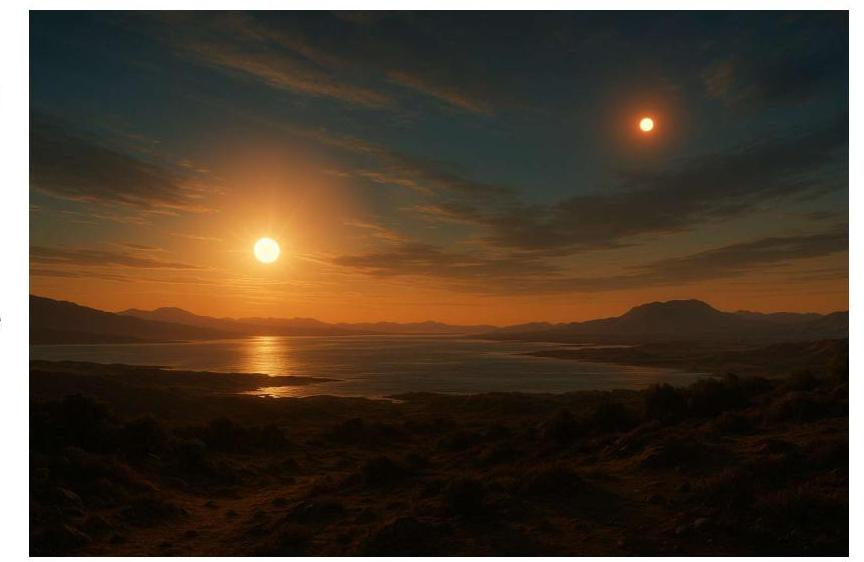

In [27]:
pdf_response.pages[3].images

[OCRImageObject(id='img-1.jpeg', top_left_x=228, top_left_y=325, bottom_right_x=1412, bottom_right_y=1094, image_base64='', image_annotation=None)]
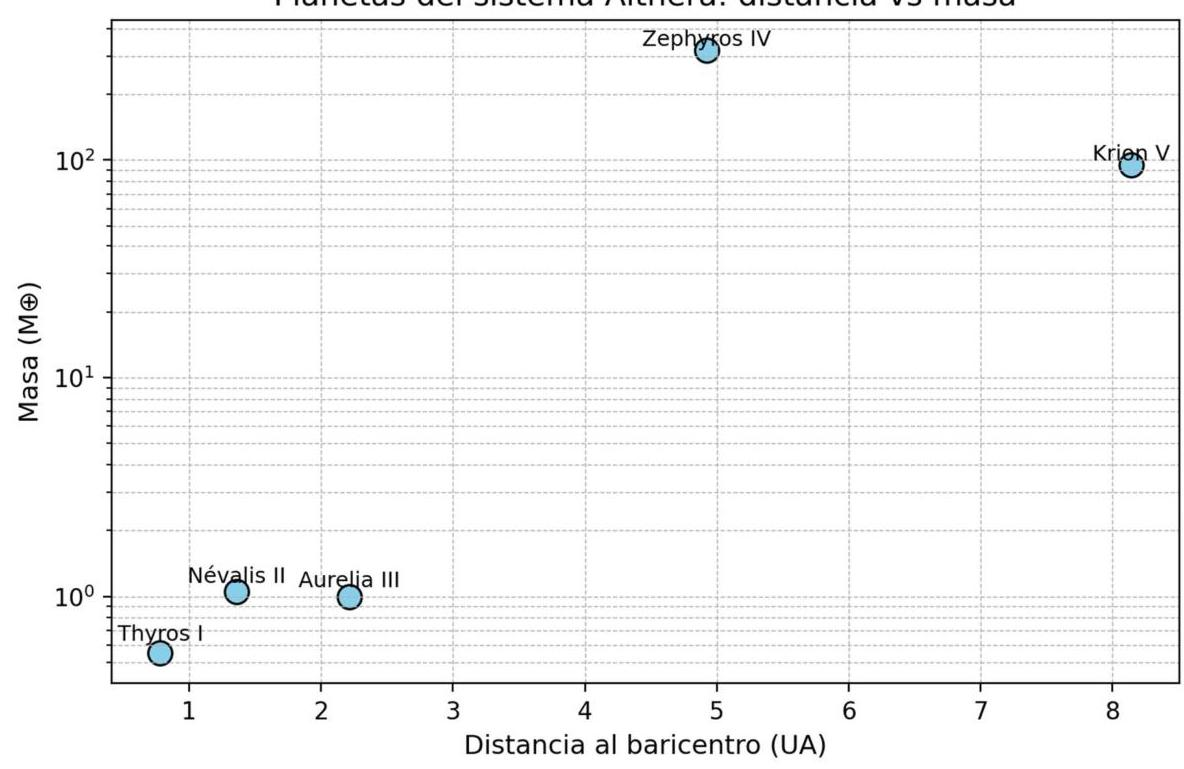

In [28]:
pdf_response.pages[5].images

### Export to Markdown

In [ ]:
# With no images

doc_md = "\n\n".join([page.markdown for page in pdf_response.pages])

output_doc_path = path_output/ output_file

with open(output_doc_path, 'w', encoding='utf-8') as f:
    f.write(doc_md)

In [ ]:
# With embedded images

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str


def get_combined_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(page.markdown, image_data))

  return "\n\n".join(markdowns)

output_doc_path = path_output/ "Divulgacion-Planetaria-Althera-wimgtb.md"  # incrustada
doc_md_wimgtb = get_combined_markdown(pdf_response)

with open(output_doc_path, 'w', encoding='utf-8') as f:
    f.write(doc_md_wimgtb)

# Annotations API


BBOX Annotations:
* SEcond stage with a VLM to analyze every element BBox with the provided instructions  

Document Annotation:
* pdf/image: All pages to image and prompt them to a VLM
* pptx/docx/...: Pages to MD and send to a VLM
* ONLY UP TO 8 PAGES



### BBox Annotations

In [29]:
from pydantic import BaseModel, Field

# BBOX Annotation response formats
class Image(BaseModel):
  image_type: str = Field(..., description="The type of the image.")
  short_description: str = Field(..., description="A description in Spanish describing the image.")
  content: str = Field(None, description="Extract and organize only the text content from the image. If there is no text, leave it empty")
  summary: str = Field(..., description="Summarize the image.")

  # ... “Don’t assign a default, the user must provide a value for this field.”


# Document Annotation response format
class Document(BaseModel):
  language: str = Field(..., description="Language in ISO 639 code")
  chapter_titles: list[str] = Field(..., description="Get sections/subsections structure up to the bottom level. Include section number of generate them")
  urls: list[str]

In [30]:
response_bbox_annot = client_mistral.ocr.process(
    model=MODEL,
    document=DocumentURLChunk(
      document_url=signed_url.url
    ),
    bbox_annotation_format=response_format_from_pydantic_model(Image),

    include_image_base64=True
  )

{
  "image_type": "nature",
  "short_description": "Una imagen de un atardecer sobre un cuerpo de agua con montañas en la distancia.",
  "content": "",
  "summary": "La imagen muestra un paisaje natural durante el atardecer. El sol se está poniendo sobre un cuerpo de agua, creando reflejos en la superficie. Hay dos soles visibles en el cielo, uno más grande y brillante cerca del horizonte y otro más pequeño y tenue más alto en el cielo. El cielo está parcialmente nublado con tonos cálidos de naranja y amarillo. En la distancia, se pueden ver montañas oscuras que se mezclan con el horizonte. La escena transmite una sensación de tranquilidad y belleza natural."
}


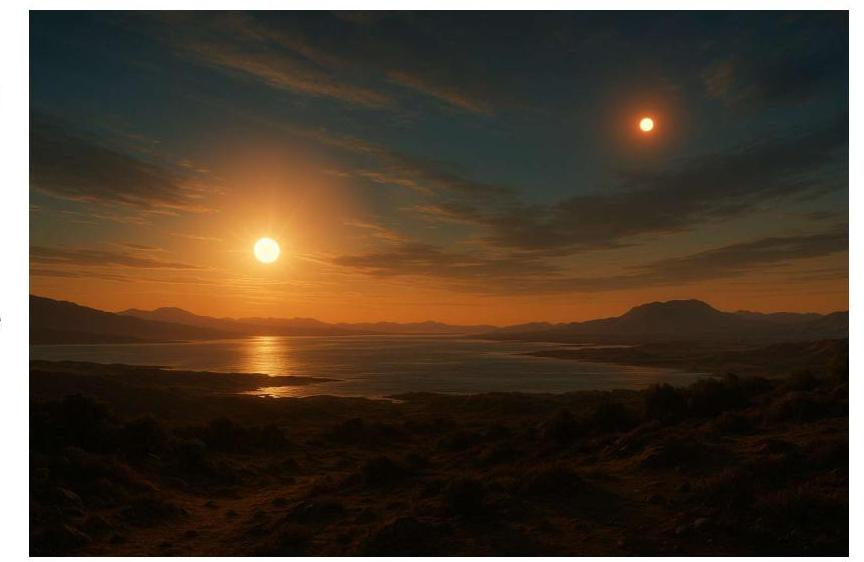

In [31]:
ex_image_mistral= response_bbox_annot.pages[3].images[0]
print(ex_image_mistral.image_annotation)


b64_str = ex_image_mistral.image_base64
b64_data = b64_str.split(",")[1]
dImage(data=base64.b64decode(b64_data))



In [32]:
len(response_bbox_annot.pages)

15

{
  "image_type": "scatter plot",
  "short_description": "Gráfico de dispersión que muestra la masa de los planetas del sistema Aither en función de su distancia al baricentro.",
  "content": "Planetas del sistema Aither: distancia VS masa\n\nMasa (M⊕)\n\n102\n101\n100\n\n1 2 3 4 5 6 7 8\nDistancia al baricentro (UA)\n\nThyros I\nNévalis II\nAurelia III\nZephyros IV\nKrien V",
  "summary": "El gráfico de dispersión muestra la relación entre la masa de los planetas del sistema Aither y su distancia al baricentro. Los planetas están etiquetados como Thyros I, Névalis II, Aurelia III, Zephyros IV y Krien V. La masa se mide en unidades de masa terrestre (M⊕) y la distancia al baricentro se mide en unidades astronómicas (UA)."
}


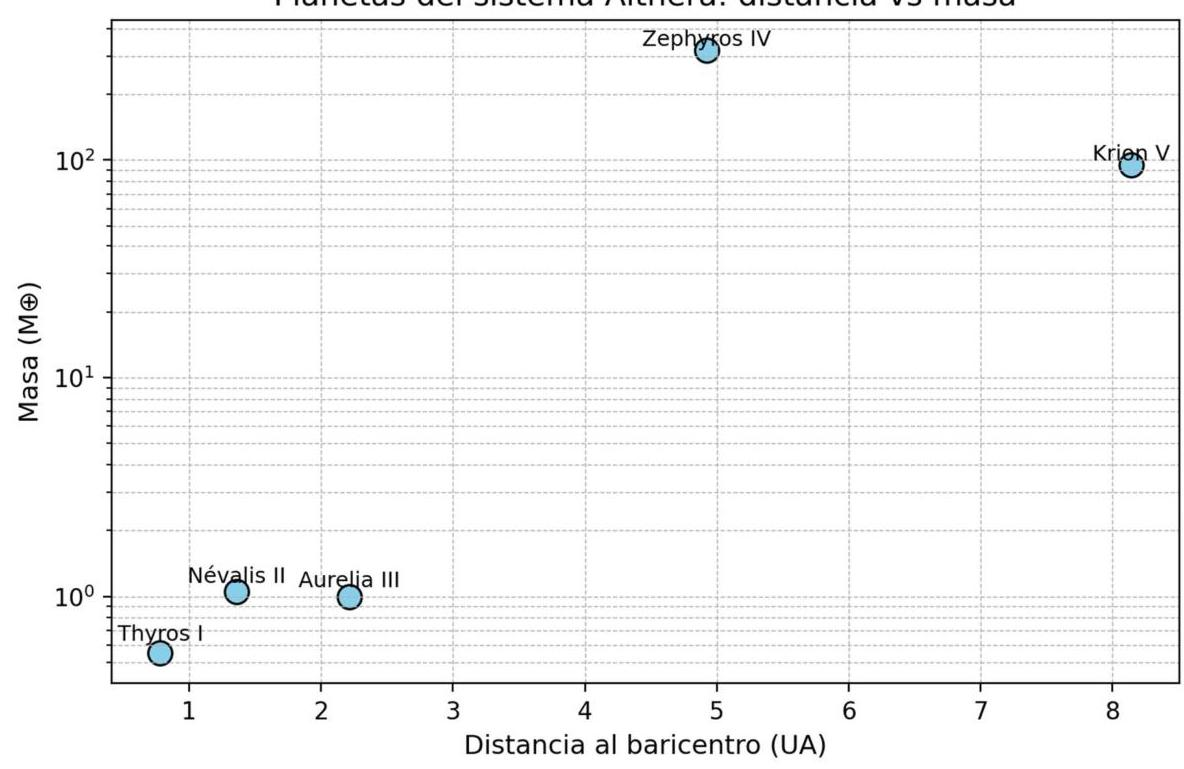

In [33]:
ex_image_mistral= response_bbox_annot.pages[5].images[0]
print(ex_image_mistral.image_annotation)


b64_str = ex_image_mistral.image_base64
b64_data = b64_str.split(",")[1]
dImage(data=base64.b64decode(b64_data))


In [38]:
len(response_bbox_annot.pages)

15

{
  "image_type": "handwritten notes",
  "short_description": "Notas manuscritas sobre estrellas y posibles exoplanetas.",
  "content": "Bellaix\nBetelgeuse\nCampaña 13-oct-2034\nAlthera\n- Oscilaciones periódicas dobles\n- Posible sistema binario\n- Exoplanetas?\nRigel\nSirph",
  "summary": "La imagen contiene notas manuscritas sobre varias estrellas, incluyendo Bellaix, Betelgeuse, Althera, Rigel y Sirph. Las notas mencionan una campaña de observación programada para el 13 de octubre de 2034 y discuten oscilaciones periódicas dobles, la posibilidad de un sistema binario y la existencia de exoplanetas."
}


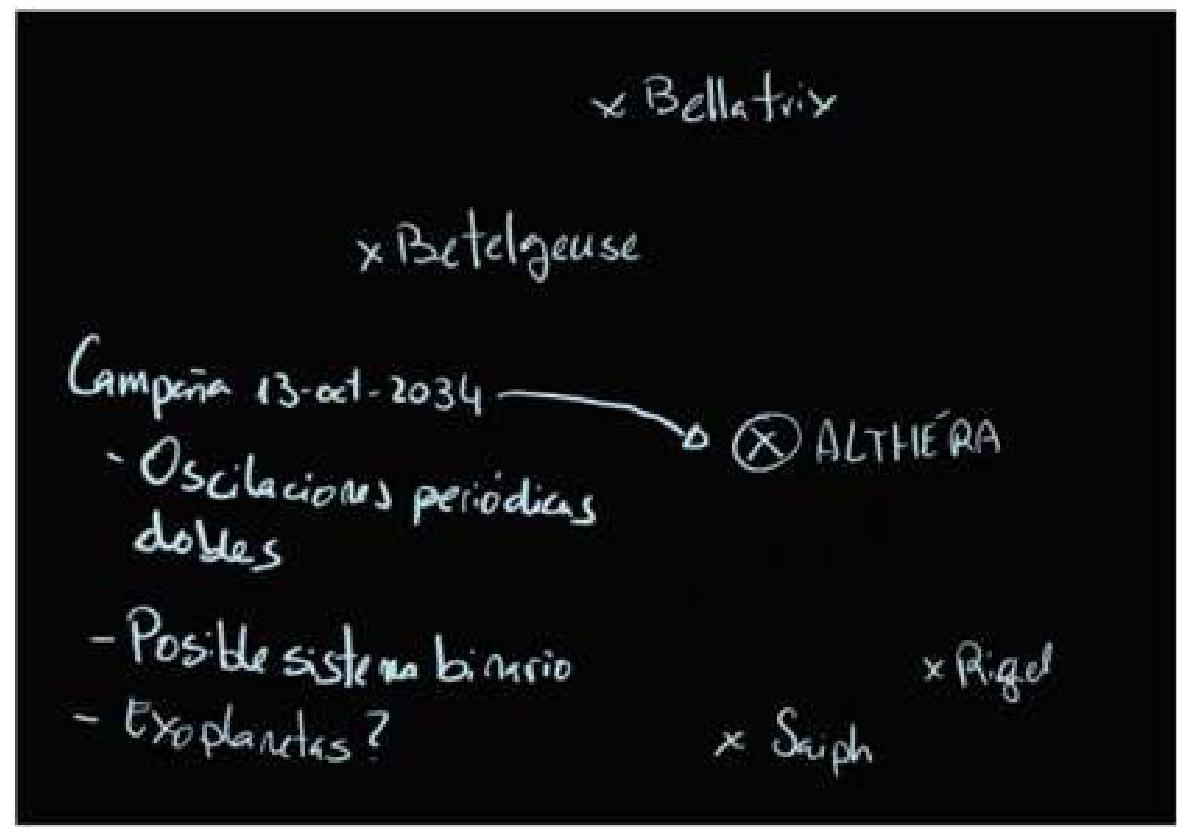

In [39]:
ex_image_mistral= response_bbox_annot.pages[-1].images[0]
print(ex_image_mistral.image_annotation)


b64_str = ex_image_mistral.image_base64
b64_data = b64_str.split(",")[1]
dImage(data=base64.b64decode(b64_data))

### Document Annotations

In [40]:
response_doc_annot = client_mistral.ocr.process(
    model=MODEL,
    document=DocumentURLChunk(
      document_url=signed_url.url
    ),
    document_annotation_format=response_format_from_pydantic_model(Document),
    pages=list(range(8)),
    include_image_base64=True
  )

In [41]:


json.loads(response_doc_annot.document_annotation)

{'language': 'es',
 'chapter_titles': ['Un nuevo y fascinante vecino: Althéra',
  'Índice',
  '1. Historia del descubrimiento',
  '1.1 Primeras observaciones y sospechas iniciales',
  '1.2 Confirmación mediante técnicas combinadas',
  '1.3 Descubrimiento revolucionario de la zona habitable circumbinaria',
  '1.4 Importancia científica y proyección futura',
  '2. Conoce a Althéra',
  '2.1 Localización en la galaxia',
  '2.2 Disposición y dinámica de un sistema binario',
  '2.3 Singularidades astronómicas',
  '3. Los soles de Althéra',
  '3.1 Clasificación espectral y diferencias principales',
  '3.2 Masas, radios y luminosidades comparadas',
  '3.3 Ciclo de vida y edad estimada del sistema binario',
  '3.4 Interacción gravitatoria y efectos sobre la zona habitable',
  '4. Estructura general del sistema planetario',
  '4.1 Distribución de órbitas y distancias medias',
  '4.2 Tipología de planetas',
  '4.3 Cinturones de asteroides y discos de escombros',
  '4.4 Estabilidad orbital en un s

## Replace images with annotations to insert the image text content in the MD

In [44]:
def replace_images_in_markdown_with_annot(markdown_str: str, images_dict: dict) -> str:
    for img_name, annot_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({annot_str})")
    return markdown_str


def get_annot_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = json.loads(img.image_annotation)['summary']
    markdowns.append(replace_images_in_markdown_with_annot(page.markdown, image_data))

  return "\n\n".join(markdowns)

In [45]:
output_doc_path = path_output/ "Divulgacion-Planetaria-Althera-wimgannot.md"  # no images, inserted content
doc_md_wimgannot = get_annot_markdown(response_bbox_annot)

with open(output_doc_path, 'w', encoding='utf-8') as f:
    f.write(doc_md_wimgannot)

# Save page chunks

In [46]:
path_output_chunks = path_data / "processed" / "chunks" / "pages" 

path_output_chunks.mkdir(
    parents=True, exist_ok=True
)

dc_chunks = []

for page in pdf_response.pages:
    dc_chunks.append(
        {"page_content": page.markdown, "metadata": {"source": "Althera"}}
        )

with open(path_output_chunks / 'Althera.json', 'w') as f:
    json.dump(dc_chunks, f)

# Resultados:
* Revisar fallos en captura de encabezados (deseado ignorarlos)
* Revisar Jerarquía de Headers